In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import solve_ivp
%matplotlib inline

# Exercise 2: Rolling down ramps



Use the differential equation

![image.png](attachment:image.png)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The ball hits the wall at t = 3.55 s


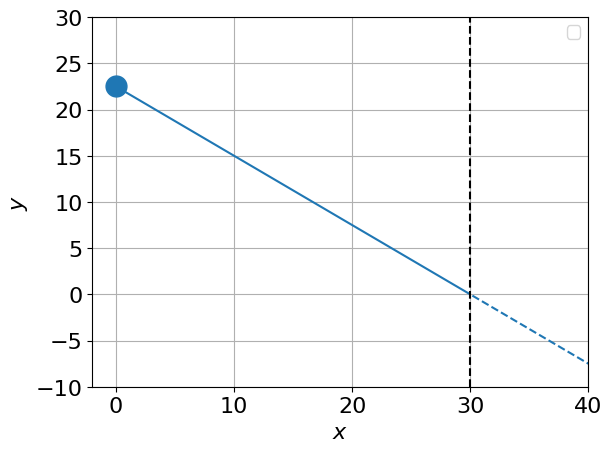

In [8]:
#Linear ramp with height 22.5 and width 30

dydx = -3/4
y_0 = 22.5
g = 9.8

#Define the linear function
def y_linear(x):
    return dydx * x + y_0

#Define the derivative of x according to the 
def dxdt_linear(t, x):
    y = y_linear(x)
    if y_0 - y < 0:
        return 0
    dxdt = np.sqrt(2*g * (y_0 - y))* 1/np.sqrt(1 + dydx**2)
    
    return dxdt

#Define the solving interval and starting parameters. Note that x_init =/= 0 so dxdt does not start at 0.
t_init = 0
t_end = 5
t_range = [t_init, t_end]
t_evals = np.linspace(t_init, t_end, 300)
x_init = [1e-3]


#Define the event function
def event_wall(t, x):
    return np.array(x) - 30


sol_lin = solve_ivp(
    dxdt_linear,
    t_span=(t_init, t_end),
    y0=x_init,
    t_eval=t_evals,
    events=event_wall
)

ts_lin = sol_lin.t
xs_lin = sol_lin.y[0]
ys_lin = y_linear(xs_lin)
wall_hit_linear = sol_lin.t_events[0][0]


plt.rc('font', size=16)
fig,ax = plt.subplots(1,1)

if sol_lin.t_events[0].size > 0:
    wall_index = np.where(xs_lin >= 30)[0][0]
    xs_before_wall = xs_lin[:wall_index]
    ys_before_wall = ys_lin[:wall_index]
    xs_after_wall = xs_lin[wall_index:]
    ys_after_wall = ys_lin[wall_index:]
    ax.plot(xs_before_wall, ys_before_wall, linestyle='-', color='tab:blue')
    ax.plot(xs_after_wall, ys_after_wall, linestyle='--', color='tab:blue')
else:
    ax.plot(xs_lin, ys_lin, linestyle='-', color='tab:blue', label='Trajectory')
ax.axvline(x=30, color='black', linestyle='--')
ax.grid()
ax.set(xlim=(-2,40), ylim =(-10, 30))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc='upper right', markerscale=0.5, fontsize = 12)


print(f'The ball hits the wall at t = {wall_hit_linear:.2f} s')

ball = ax.plot(xs_lin[0], ys_lin[0], 'o', color='tab:blue', ms = 15)[0]



In [9]:
#Animate the linear ramp
def update(i):
    ball.set_data(xs_lin[i], ys_lin[i])
    ax.set_title(f't = {ts_lin[i]:.2f} s')
    ball.set_label(f't = {wall_hit_linear:.2f} s')
    if ts_lin[i] < wall_hit_linear:
        ball.set_label(f't = {ts_lin[i]:.2f} s')
        ax.legend(loc='upper right', markerscale=0.5, fontsize = 12)
    return ax

anim = animation.FuncAnimation(fig, update, frames = len(xs_lin), interval = 1, blit = False)
anim.save('Animations\\linear_ramp.gif', writer='pillow', fps=30, savefig_kwargs={'transparent':True})

C:\Users\tobia\AppData\Local\Temp\ipykernel_13692\1420291394.py:3: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  ball.set_data(xs_lin[i], ys_lin[i])


# Parabola


In [10]:
from sympy import solve, symbols, Eq

#Start by solving the quadratic equation for the coefficients a and b
a, b = symbols('a b')


sol = solve([Eq(a*10**2 + b*10 + 22.5, 0), Eq(a*30**2 + b*30 + 22.5, 0)], (a, b))
a,b = float(sol[a]), float(sol[b])






No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The ball hits the wall at t = 3.42 s


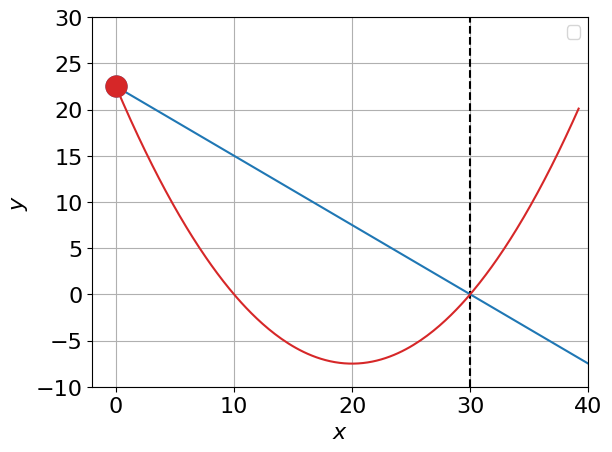

In [11]:
fig, ax = plt.subplots()



y_0 = 22.5


def y_quadratic(x):
    return a*x**2 + b*x + 22.5

def dydx_quad(x):
    return 2*a*x + b

def dxdt_quadratic(t,x):
    y = y_quadratic(x)
    if y_0 - y < 0:
        return 0
    dxdt = np.sqrt(2*g * (y_0 - y))* 1/np.sqrt(1 + dydx_quad(x)**2)
    
    return dxdt


#Define the solving interval and starting parameters. Note that x_init =/= 0 so dxdt does not start at 0.
t_init = 0
t_end = 5
t_range = [t_init, t_end]
t_evals = np.linspace(t_init, t_end, 300)
x_init = [1e-3]

#Define the event function
def event_wall(t, x):
    return np.array(x) - 30


sol_quad = solve_ivp(
    dxdt_quadratic,
    t_span=(t_init, t_end),
    y0=x_init,
    t_eval=t_evals,
    events=event_wall)


ts_quad = sol_quad.t
xs_quad = sol_quad.y[0]
ys_quad = y_quadratic(xs_quad)
wall_hit_quad = sol_quad.t_events[0][0]


#ball = ax.plot(xs[0], ys[0], 'o',ms = 20, color = 'tab:blue', label = f't = {ts[0]:.2f}')[0]
ax.axvline(x=30, color='black', linestyle='--')
ax.grid()
ax.set(xlim=(-2,40), ylim =(-10, 30))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')



#Linear ramp with height 22.5 and width 30
ax.plot(xs_lin, ys_lin, linestyle='-', color='tab:blue')
ball_lin = ax.plot(xs_lin[0], ys_lin[0], 'o', color='tab:blue', ms = 15)[0]

#Quadratic ramp with height 22.5 and width 30
ax.plot(xs_quad, ys_quad, linestyle='-', color='tab:red')
ball_quad = ax.plot(xs_quad[0], ys_quad[0], 'o', color='tab:red', ms = 15)[0]

ax.legend(loc='upper right', markerscale=0.5, fontsize = 12)

print(f'The ball hits the wall at t = {wall_hit_quad:.2f} s')


In [12]:

def update_lin_quad(i):
    ball_lin.set_data(xs_lin[i], ys_lin[i])
    ball_quad.set_data(xs_quad[i], ys_quad[i])
    ax.set_title(f't = {ts_lin[i]:.2f} s')
    ball_lin.set_label(f't = {wall_hit_linear:.2f} s')
    ball_quad.set_label(f't = {wall_hit_quad:.2f} s')
    if ts_lin[i] < wall_hit_linear:
        ball_lin.set_label(f't = {ts_lin[i]:.2f} s')
        ax.legend(loc='upper right', markerscale=0.5, fontsize = 12)
    if ts_quad[i] < wall_hit_quad:
        ball_quad.set_label(f't = {ts_quad[i]:.2f} s')
        ax.legend(loc='upper right', markerscale=0.5, fontsize = 12)
    return ax

anim = animation.FuncAnimation(fig, update_lin_quad, frames = len(xs_lin), interval = 1, blit = False)
anim.save('Animations\\linear_vs_quadratic.gif', writer='pillow', fps=30,savefig_kwargs={'transparent':True})

C:\Users\tobia\AppData\Local\Temp\ipykernel_13692\3603996155.py:2: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  ball_lin.set_data(xs_lin[i], ys_lin[i])
C:\Users\tobia\AppData\Local\Temp\ipykernel_13692\3603996155.py:3: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  ball_quad.set_data(xs_quad[i], ys_quad[i])


# Brachistochrone



$x = a(\phi - \sin\phi)$


$y = a(1 + \cos\phi) + y_0$


$a = \frac{x}{(\phi - \sin\phi)}$

$y_0 = y - a(1 + \cos\phi)$

In [13]:
from scipy.optimize import fsolve


def a_func(phi):
    return (np.cos(phi) - 1)/(phi - np.sin(phi)) + 3/4

phi_1 = fsolve(a_func, 0.5)[0]

print(f'phi1 = {phi_1:.2f}')


#phi1 defines the endpoint of the first segment of the curve, where x = 30 and y = 0:
a_brach = 30/(phi_1 - np.sin(phi_1))
y_0_brach = 0 - a_brach * (1 + np.cos(phi_1))
print(f'a = {a_brach:.2f}, y_0 = {y_0_brach:.2f}')

y_00 = a_brach * (1 + np.cos(0))

print(f'y_00 = {y_00:.2f}')


phi1 = 2.88
a = 11.44, y_0 = -0.39
y_00 = 22.89


C:\Users\tobia\AppData\Local\Temp\ipykernel_13692\1048052801.py:6: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  phi_x = fsolve(lambda phi: a_brach * (phi - np.sin(phi)) - x, 0)[0]


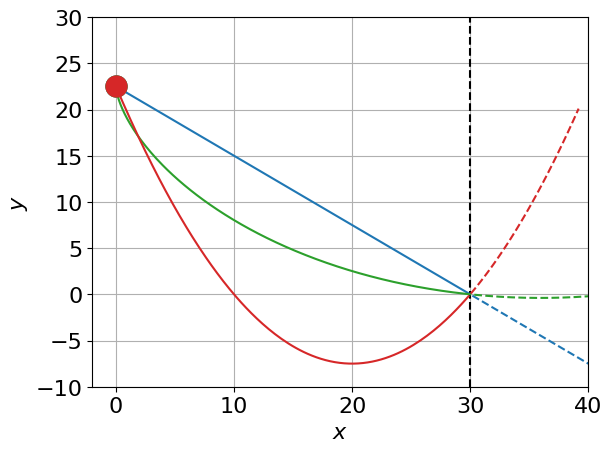

In [14]:
fig, ax = plt.subplots()



def y_brach(x):
    phi_x = fsolve(lambda phi: a_brach * (phi - np.sin(phi)) - x, 0)[0]
    return y_0_brach + a_brach * (1 + np.cos(phi_x))


def dydx_brach(x, delta_x = 0.001):
    f_x = y_brach(x)
    f_x_dx = y_brach(x + delta_x)
    return (f_x_dx - f_x)/delta_x



def dxdt_brachistochrone(t,x):
    y = y_brach(x)

    if y_00 - y < 0:
        return 0
    dxdt = np.sqrt(2*g * (y_00 - y))* 1/np.sqrt(1 + dydx_brach(x)**2)

    return dxdt


#Define the solving interval and starting parameters. Note that x_init =/= 0 so dxdt does not start at 0.
t_init = 0
t_end = 5
t_range = [t_init, t_end]
t_evals = np.linspace(t_init, t_end, 300)
x_init = [1e-3]

#Define the event function
def event_wall(t, x):
    return np.array(x) - 30



sol_brach = solve_ivp(
    dxdt_brachistochrone,
    t_span=(t_init, t_end),
    y0=x_init,
    t_eval=t_evals,
    events=event_wall)


ts_brach = sol_brach.t
xs_brach = sol_brach.y[0]
ys_brach = [y_brach(x) for x in xs_brach]
wall_hit_brach = sol_brach.t_events[0][0]



#ball = ax.plot(xs[0], ys[0], 'o',ms = 20, color = 'tab:blue', label = f't = {ts[0]:.2f}')[0]
ax.axvline(x=30, color='black', linestyle='--')
ax.grid()
ax.set(xlim=(-2,40), ylim =(-10, 30))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


#Linear ramp with height 22.5 and width 30

wall_index_lin = np.where(xs_lin >= 30)[0][0]
ax.plot(xs_lin[:wall_index_lin], ys_lin[:wall_index_lin], linestyle='-', color='tab:blue')
ax.plot(xs_lin[wall_index_lin:], ys_lin[wall_index_lin:], linestyle='--', color='tab:blue')
ball_lin = ax.plot(xs_lin[0], ys_lin[0], 'o', color='tab:blue', ms = 15)[0]

#Brachistochrone curve

#phi = np.linspace(0, phi_1, 100)
#xs_brach, ys_brach = brachistochrone(phi)
wall_index_brach = np.where(xs_brach >= 30)[0][0]
ax.plot(xs_brach[:wall_index_brach], ys_brach[:wall_index_brach], linestyle='-', color='tab:green')
ax.plot(xs_brach[wall_index_brach:], ys_brach[wall_index_brach:], linestyle='--', color='tab:green')
ball_brach = ax.plot(xs_brach[0], ys_brach[0], 'o', color='tab:green', ms = 15)[0]


#Quadratic ramp with height 22.5 and width 30
wall_index_quad = np.where(xs_quad >= 30)[0][0]
ax.plot(xs_quad[:wall_index_quad], ys_quad[:wall_index_quad], linestyle='-', color='tab:red')
ax.plot(xs_quad[wall_index_quad:], ys_quad[wall_index_quad:], linestyle='--', color='tab:red')
ball_quad = ax.plot(xs_quad[0], ys_quad[0], 'o', color='tab:red', ms = 15)[0]






#ax.legend(loc='upper right', markerscale=0.5, fontsize = 12)



In [15]:
def update_lin_quad_brach(i):
    ball_lin.set_data(xs_lin[i], ys_lin[i])
    ball_brach.set_data(xs_brach[i], ys_brach[i])
    ball_quad.set_data(xs_quad[i], ys_quad[i])    
    ax.set_title(f't = {ts_brach[i]:.2f} s')
    ball_lin.set_label(f't = {wall_hit_linear:.2f} s')
    ball_brach.set_label(f't = {wall_hit_brach:.2f} s')
    ball_quad.set_label(f't = {wall_hit_quad:.2f} s')

    #Update the labels of the balls
    if ts_brach[i] < wall_hit_brach:
        ball_brach.set_label(f't = {ts_brach[i]:.2f} s')
        
    if ts_lin[i] < wall_hit_linear:
        ball_lin.set_label(f't = {ts_lin[i]:.2f} s')
        
    if ts_quad[i] < wall_hit_quad:
        ball_quad.set_label(f't = {ts_quad[i]:.2f} s')

    ax.legend(loc='upper right', markerscale=0.5, fontsize = 12)
    return ax

anim = animation.FuncAnimation(fig, update_lin_quad_brach, frames = len(xs_brach), interval = 1, blit = False)
anim.save('Animations\\linear_vs_quadratic_vs_brachistochrone.gif', writer='pillow', fps=30, savefig_kwargs={'transparent':True})

C:\Users\tobia\AppData\Local\Temp\ipykernel_13692\65183228.py:2: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  ball_lin.set_data(xs_lin[i], ys_lin[i])
C:\Users\tobia\AppData\Local\Temp\ipykernel_13692\65183228.py:3: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  ball_brach.set_data(xs_brach[i], ys_brach[i])
C:\Users\tobia\AppData\Local\Temp\ipykernel_13692\65183228.py:4: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  ball_quad.set_data(xs_quad[i], ys_quad[i])


# Tautochrone


TypeError: 'NoneType' object is not subscriptable

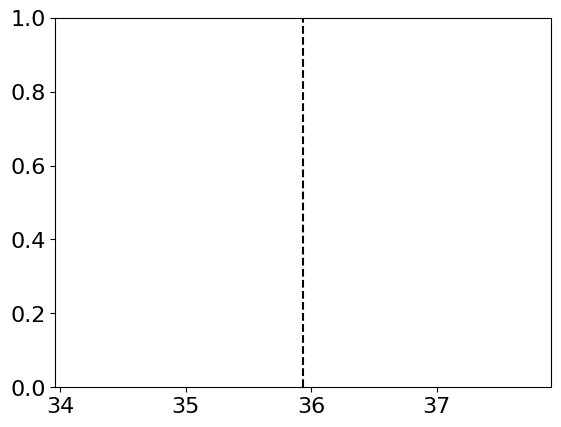

In [16]:
fig, ax = plt.subplots()

#Three different balls:


xs_for_min = np.linspace(0, 50, 1000)
ys_for_min = [y_brach(x) for x in xs_for_min]
y_min = np.min(ys_for_min)

y_min_idx = np.argmin(ys_for_min)
x_min = xs_for_min[y_min_idx]


ax.axvline(x = x_min, color = 'black', linestyle = '--')


start_xs = [3, 10, 20]




ts_list = []
xs_list = []
ys_list = []
wall_hits = []
def event_min(t, x):
    return np.array(x) - x_min


for i, start_x in enumerate(start_xs):
    y_init = y_brach(start_x)
    x_init = start_x

    def dxdt_brachistochrone(t,x):
        y = y_brach(x)
        if y_init - y < 0:
            return 0
        dxdt = np.sqrt(2*g * (y_init + 0.001 - y))* 1/np.sqrt(1 + dydx_brach(x)**2)

        return dxdt
    
    sol = solve_ivp(
        dxdt_brachistochrone,
        t_span=(t_init, t_end),
        y0=[x_init],
        t_eval=t_evals,
        events=None)
    ts = sol.t
    xs = sol.y[0]
    ys = [y_brach(x) for x in xs]
    wall_hit = sol.t_events[0][0]
    
    ts_list.append(ts)
    xs_list.append(xs)
    ys_list.append(ys)
    wall_hits.append(wall_hit)
    print(f'The ball hits the wall at t =  {wall_hit:.1f} s')
    








ax.grid()
ax.set(xlim=(-2,40), ylim =(-10, 30))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ball_list = [ None for i in range(3)]

color_list = ['tab:blue', 'tab:red', 'tab:green']
for xs, ys, color, i in zip(xs_list, ys_list, color_list, range(3)):
    ax.plot(xs, ys, linestyle='-', color='tab:orange')
    ball_list[i] = ax.plot(xs[0], ys[0], 'o',ms = 20, color = color, label = f't = {ts[0]:.2f}', zorder = 10)[0]


In [ ]:
def update_tautochrone(i):
    for j in range(len(start_xs)):
        ball_list[j].set_data(xs_list[j][i], ys_list[j][i])
        ball_list[j].set_label(f't = {wall_hits[j]:.1f} s')
        if ts_list[j][i] < wall_hits[j]:
            ball_list[j].set_label(f't = {ts_list[j][i]:.1f} s')
    ax.set_title(f't = {ts_list[0][i]:.1f} s')
    ax.legend(loc='upper right', markerscale=0.5, fontsize = 12)
    return ax

anim = animation.FuncAnimation(fig, update_tautochrone, frames = len(xs_list[0]), interval = 1, blit = False)
anim.save('Animations\\tautochrone.gif', writer='pillow', fps=30, savefig_kwargs={'transparent':True})

IndexError: list index out of range

In [ ]:
class Box():
    def __init__(self, y, dydx, times, x0, markersize = 10):
        self.y = y
        self.dydx = dydx
        self.times = times  
        self.x0 = x0
        self.xs = None
        self.ts = None
        self.ys = None
        self.events = None
        self.drawing_elements = {}
        self.orientations = None
        self.markersize = 10
    
    def dydx_brach(self, x, delta_x = 0.001):
        f_x = y_brach(x)
        f_x_dx = y_brach(x + delta_x)
        return (f_x_dx - f_x)/delta_x
    
    def _solve_ode(self, event = None):
        y_init = self.y(self.x0)
        x_init = self.x0
        t_init = self.times[0]
        t_end = self.times[-1]
        t_evals = self.times
        event_hit = None

        def dxdt(t,x):
            y_curr = self.y(x)
            if y_init - y_curr < 0:
                return 0
            dxdt = np.sqrt(2*g * (y_init + 0.001 - y_curr))* 1/np.sqrt(1 + dydx_brach(x)**2)

            return dxdt
        
        sol = solve_ivp(
            dxdt,
            t_span=(t_init, t_end),
            y0=[x_init],
            t_eval=t_evals,
            events=event)
        ts = sol.t
        xs = sol.y[0]
        ys = [y_brach(x) for x in xs]
        if event != None:
            event_hit = sol.t_events[0]
        rotations = [np.arctan(dydx_brach(x)) for x in xs]
        return ts, xs, ys, event_hit, rotations
    

    def draw(self, ax, t):

        t_idx = np.argmin(np.abs(self.times - t))
        if t_idx == len(self.times):
            t_idx -= 1
        if self.drawing_elements == {}:
            
            if (t < self.times[0]) or (t > self.times[-1]):
                return None
            self.ts, self.xs, self.ys, self.events, self.orientations = self._solve_ode(self.events)
            self.drawing_elements[ax] = ax.plot(self.xs, self.ys, marker = (4,0,45), markersize = self.markersize)[0]
        
        rotation_rad = self.orientations[t_idx] - np.pi/2
        rotation_deg =  45 + np.degrees(rotation_rad)
        
        adjusted_x = self.xs[t_idx] - self.markersize/14 * np.cos(rotation_rad)
        adjusted_y = self.ys[t_idx] - self.markersize/14 * np.sin(rotation_rad)
        self.drawing_elements[ax].set_data(adjusted_x, adjusted_y)
        self.drawing_elements[ax].set_marker((4,0,rotation_deg))

        return self.drawing_elements[ax]

C:\Users\tobia\AppData\Local\Temp\ipykernel_2616\1481179028.py:68: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  self.drawing_elements[ax].set_data(adjusted_x, adjusted_y)


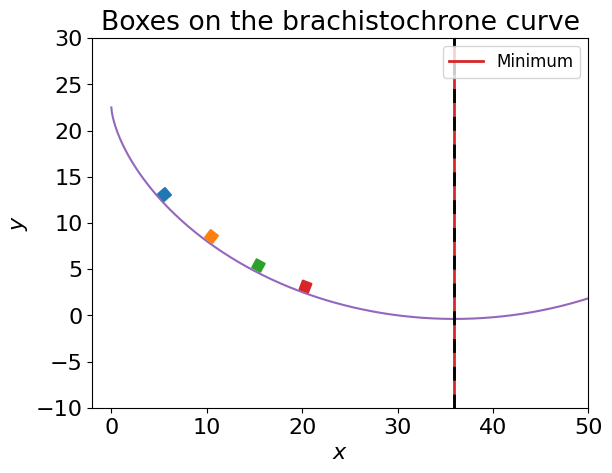

In [58]:
times = np.arange(0,7,0.1)

boxes = []
y = y_brach
dydx = dydx_brach
for x0 in np.arange(5,25, 5):
    box = Box(y, dydx, times, x0=x0)
    boxes.append(box)

def update(i):
    t = times[i]

    updated_drawing_elements = []
    for box in boxes:
        element = box.draw(ax,t)
        updated_drawing_elements.append(element)
    return updated_drawing_elements

fig, ax = plt.subplots()
ax.set(xlim=(-2,50), ylim =(-10, 30))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
xs_for_plot = np.linspace(0, 50, 1000)
ys_for_plot = [y_brach(x) for x in xs_for_plot]
x_min = xs_for_plot[np.argmin(ys_for_plot)]
min_line1 = ax.axvline(x = x_min, color = 'tab:red', linestyle = '-', linewidth = 2)
min_line2 =ax.axvline(x = x_min, color = 'black', linestyle = '--', dashes = (5,5), linewidth = 2)
ax.plot(xs_for_plot, ys_for_plot, color = 'tab:purple', zorder = 0)
ax.legend([min_line1, min_line2], ['Minimum'], loc = 'upper right', fontsize = 12)

ax.set_title('Boxes on the brachistochrone curve')
anim = animation.FuncAnimation(fig, update, frames = len(times), interval = 1, blit = False)
anim.save('Animations\\boxes.gif', writer='pillow', fps=10, savefig_kwargs={'transparent':True})

1.5607966601082315


C:\Users\tobia\AppData\Local\Temp\ipykernel_2616\1481179028.py:68: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  self.drawing_elements[ax].set_data(adjusted_x, adjusted_y)


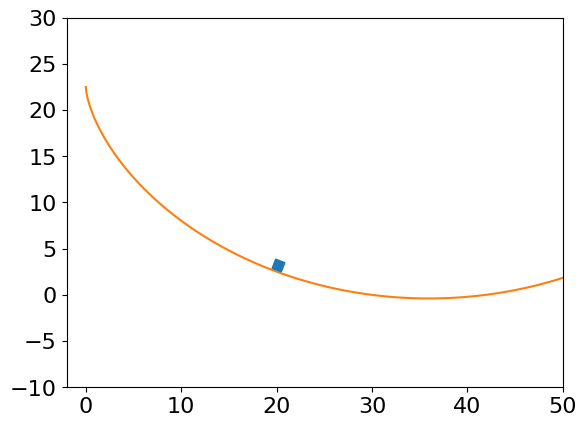

In [59]:
box = Box(y_brach, dydx_brach, times, x0=10)

fig, ax = plt.subplots()
ax.set(xlim=(-2,50), ylim =(-10, 30))

ax.plot(xs_for_plot, ys_for_plot, color = 'tab:orange', zorder = 0)
box.draw(ax, 2)

print(np.arctan(100))

# Exercise 3: Triangles in the plane

In [98]:
class Trekant():

    def __init__(self, points, color = 'tab:blue'):
        assert isinstance(points, (np.ndarray, list)), 'Points must be a numpy array or a list'
        points = np.array(points)
        assert points.shape == (3,2), 'Triangle must have 3 points'
            
        self._points = points
        self.cm = [np.mean(points[:,0]), np.mean(points[:,1])]
        self._color = color
        self.triangle = None
        self.cross = None
        
    
    def draw(self, ax):
        if self.triangle == None:
            self.triangle = ax.fill(self.points[:,0], self.points[:,1], color = self.color)
            self.cross = ax.plot(self.cm[0], self.cm[1], 'x', color = 'black', ms = 10, zorder = 10, markeredgewidth = 2)
            return self.triangle, self.cross
        else:
            self.triangle[0].set_xy(self.points)
            self.triangle[0].set_color(self.color)
            self.cm = [np.mean(self.points[:,0]), np.mean(self.points[:,1])]
            self.cross[0].set_data(self.cm[0], self.cm[1])
            return self.triangle, self.cross
    
    def move(self, r):
        self.points += np.array([r[0], r[1]])
        return self.draw(ax)
    
    @property
    def points(self):
        return self._points
    
    @points.setter
    def points(self, new_points):
        if np.array_equal(new_points, self._points):
            return None
        assert new_points.shape == (3,2), 'Triangle must have 3 points'
        self._points = new_points
        return self.draw(ax)

    @property
    def color(self):
        return self._color
    
    @color.setter
    def color(self, new_color):
        if new_color == self._color:
            return None
        self._color = new_color
        return self.draw(ax)


    

([<matplotlib.patches.Polygon at 0x19da72f5bb0>],
 [<matplotlib.lines.Line2D at 0x19da72f7050>])

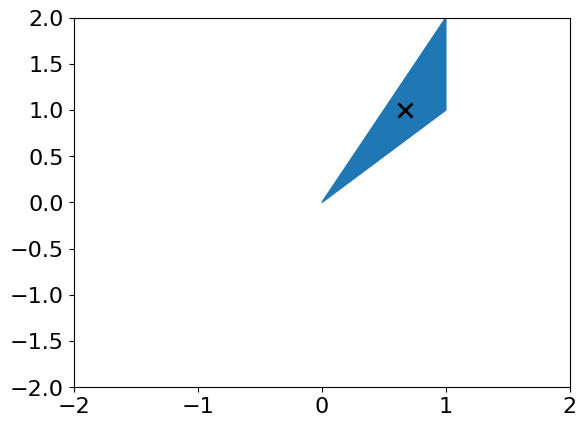

In [102]:
fig, ax = plt.subplots()
ax.set(xlim=(-2,2), ylim =(-2, 2))  

points = np.array([[0,0], [1,2], [1, 1]])
trekant = Trekant(points)
trekant.draw(ax)


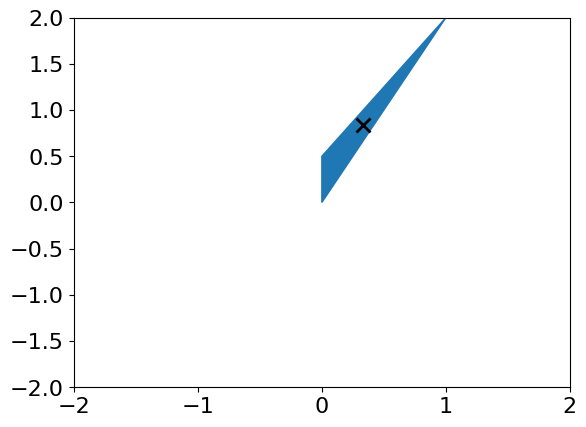

In [104]:

#Define new points
new_points = np.array([[0,0], [0,1/2], [1, 2]])
trekant.points = new_points



#
#trekant.move([-1,0])
fig

In [ ]:
trekant = Trekant([2,3,], color = 'tab:blue')



AssertionError: Triangle must have 3 points

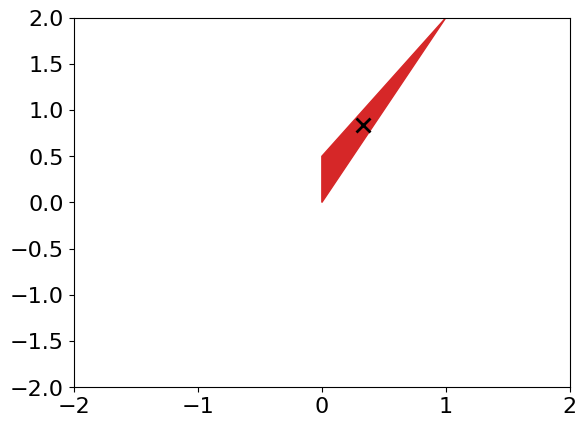

In [94]:
trekant.color = ('tab:red')
fig

